<a href="https://colab.research.google.com/github/ExCaLBBR/ExCaLBBR_Projects/blob/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/code/RBD_diagnosticAnalyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
# @title Install dependancies
import pandas as pd #for dealing with csv import
import numpy as np #for the population std
from scipy.stats import sem
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import warnings

In [216]:
#@title Define utility functions
def weightedHeatmap(PairData, words, PlotHM, Title):

    '''
    Restructure RT into matrix data structure

    '''

    Wmat = np.zeros((len(words),len(words)))
    t = 0
    z = 0

    for i in range(len(words)):
        for j in range(len(words)):

            if i == j:
                Wmat[i,j] = np.NaN

            elif j > i:
                Wmat[i,j] = PairData[t]
                Wmat[j,i] = PairData[t]
                t += 1


    if PlotHM == 1:
        plt.title(Title)
        plt.imshow(Wmat,  cmap='RdBu', vmin=-7, vmax=7)
        plt.colorbar()
        plt.xticks(range(len(words)), words, rotation='vertical')
        plt.yticks(range(len(words)), words)
        plt.show()

    return Wmat

def item_randperm(ntimes, nperm):

    '''
      p = item_randperm(nitems,nperm)
      Parameters: number of items, number of random permutations
      Output: a matrix with nperm rows;
      Each row is an index of permuted item positions.

      returns a matrix (n,nitems)
      each row is a random permutation of nitems (labelled 1:nitems)
      produces n such permutations
      the random seed is changed at every call

    '''

    p = np.zeros((nperm, ntimes))
    for i in range(nperm):
        p[i,:] = np.random.permutation(ntimes)

    return p

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [217]:
#@title Load Data:

#Load IAT and BiasDecision (BD) data
C_IAT = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/analysis/C_IAT_df.csv", header=0)
W_IAT = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/analysis/W_IAT_df.csv", header=0)

C_AdvIn = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/analysis/C_AdvIn_df.csv", header=0)
C_AdvOut = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/analysis/C_AdvOut_df.csv", header=0)
W_AdvIn = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/analysis/W_AdvIn_df.csv", header=0)
W_AdvOut = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/analysis/W_AdvOut_df.csv", header=0)

#Replace with relevant demographic and questionnaire data
demographic_C = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/demographic_C.csv", header=1)
demographic_W = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/demographic_W.csv", header=1)

ZeroSum_C = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/ZeroSum_C.csv", header=1)
ZeroSum_W = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/ZeroSum_W.csv", header=1)

SDO_C = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/SDO_C.csv", header=1)
SDO_W = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/SDO_W.csv", header=1)

RWAS_C = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/RWAS_C.csv", header=1)
RWAS_W = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/RWAS_W.csv", header=1)

News_C = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/News_C.csv", header=1)
News_W = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/News_W.csv", header=1)

JustWorld_C = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/JustWorld_C.csv", header=1)
JustWorld_W = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/JustWorld_W.csv", header=1)

CRDiscrim_C = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/GRDiscrim_C.csv", header=1)
CRDiscrim_W = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/GRDiscrim_w.csv", header=1)

EthID_C = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/EthId_C.csv", header=1)
EthID_W = pd.read_csv("https://github.com/ExCaLBBR/ExCaLBBR_Projects/raw/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/EthId_W.csv", header=1)

In [218]:
#@title Data Format Correction
#Fix Dataframe headers
ZeroSum_C = ZeroSum_C.drop(labels=0, axis=0)
ZeroSum_W = ZeroSum_W.drop(labels=0, axis=0)
SDO_C = SDO_C.drop(labels=0, axis=0)
SDO_W = SDO_W.drop(labels=0, axis=0)
RWAS_C = RWAS_C.drop(labels=0, axis=0)
RWAS_W = RWAS_W.drop(labels=0, axis=0)
News_C = News_C.drop(labels=0, axis=0)
News_W = News_W.drop(labels=0, axis=0)
JustWorld_C = JustWorld_C.drop(labels=0, axis=0)
JustWorld_W = JustWorld_W.drop(labels=0, axis=0)
CRDiscrim_C = CRDiscrim_C.drop(labels=0, axis=0)
CRDiscrim_W = CRDiscrim_W.drop(labels=0, axis=0)
EthID_C = EthID_C.drop(labels=0, axis=0)
EthID_W = EthID_W.drop(labels=0, axis=0)

#Fix ID formatting
ZeroSum_C['Question Key'] = [sub[: -2] for sub in ZeroSum_C['Question Key']]
ZeroSum_W['Question Key'] = [sub[: -2] for sub in ZeroSum_W['Question Key']]
SDO_C['Question Key'] = [sub[: -2] for sub in SDO_C['Question Key']]
SDO_W['Question Key'] = [sub[: -2] for sub in SDO_W['Question Key']]
RWAS_C['Question Key'] = [sub[: -2] for sub in RWAS_C['Question Key']]
RWAS_W['Question Key'] = [sub[: -2] for sub in RWAS_W['Question Key']]
News_C['Question Key'] = [sub[: -2] for sub in News_C['Question Key']]
News_W['Question Key'] = [sub[: -2] for sub in News_W['Question Key']]
JustWorld_C['Question Key'] = [sub[: -2] for sub in JustWorld_C['Question Key']]
JustWorld_W['Question Key'] = [sub[: -2] for sub in JustWorld_W['Question Key']]
CRDiscrim_C['Question Key'] = [sub[: -2] for sub in CRDiscrim_C['Question Key']]
CRDiscrim_W['Question Key'] = [sub[: -2] for sub in CRDiscrim_W['Question Key']]
EthID_C['Question Key'] = [sub[: -2] for sub in EthID_C['Question Key']]
EthID_W['Question Key'] = [sub[: -2] for sub in EthID_W['Question Key']]

#Convert participant IDs to strs
C_IAT['Participant Private ID'] = C_IAT['Participant Private ID'].astype(str)
W_IAT['Participant Private ID'] = W_IAT['Participant Private ID'].astype(str)

C_AdvIn['Participant Private ID'] = C_AdvIn['Participant Private ID'].astype(str)
C_AdvOut['Participant Private ID'] = C_AdvOut['Participant Private ID'].astype(str)
W_AdvIn['Participant Private ID'] = W_AdvIn['Participant Private ID'].astype(str)
W_AdvOut['Participant Private ID'] = W_AdvOut['Participant Private ID'].astype(str)

In [219]:
#@title Data Scoring

warnings.filterwarnings("ignore")

#Zerosum
ZeroSum_C['ZSum9'] = 8-ZeroSum_C['ZSum9']
ZeroSum_C['ZSum10'] = 8-ZeroSum_C['ZSum10']
ZeroSum_C['ZSum11'] = 8-ZeroSum_C['ZSum11']
ZeroSum_C['ZSum12'] = 8-ZeroSum_C['ZSum12']
ZeroSum_W['ZSum9'] = 8-ZeroSum_W['ZSum9']
ZeroSum_W['ZSum10'] = 8-ZeroSum_W['ZSum10']
ZeroSum_W['ZSum11'] = 8-ZeroSum_W['ZSum11']
ZeroSum_W['ZSum12'] = 8-ZeroSum_W['ZSum12']
ZeroSum_C = pd.DataFrame({'Participant Private ID':ZeroSum_C['Question Key'],'ZSumAvg':ZeroSum_C[ZeroSum_C!='Question Key'].mean(axis=1)})
ZeroSum_W = pd.DataFrame({'Participant Private ID':ZeroSum_W['Question Key'],'ZSumAvg':ZeroSum_W[ZeroSum_W!='Question Key'].mean(axis=1)})

#SDO
SDO_C['SDO3_NK'] = 8-SDO_C['SDO3_NK']
SDO_C['SDO4_NK'] = 8-SDO_C['SDO4_NK']
SDO_C['SDO7_NK'] = 8-SDO_C['SDO7_NK']
SDO_C['SDO8_NK'] = 8-SDO_C['SDO8_NK']
SDO_W['SDO3_NK'] = 8-SDO_W['SDO3_NK']
SDO_W['SDO4_NK'] = 8-SDO_W['SDO4_NK']
SDO_W['SDO7_NK'] = 8-SDO_W['SDO7_NK']
SDO_W['SDO8_NK'] = 8-SDO_W['SDO8_NK']
SDO_C = pd.DataFrame({'Participant Private ID':SDO_C['Question Key'],'SDOAvg':SDO_C[SDO_C!='Question Key'].mean(axis=1)})
SDO_W = pd.DataFrame({'Participant Private ID':SDO_W['Question Key'],'SDOAvg':SDO_W[SDO_W!='Question Key'].mean(axis=1)})

#RWAS [Need to score the full questionnaire; use Pol Aff as a proxy]
PolAff_C = pd.DataFrame({'Participant Private ID':RWAS_C['Question Key'],'PolAff':RWAS_C['Political_Affiliation']})
PolAff_W = pd.DataFrame({'Participant Private ID':RWAS_W['Question Key'],'PolAff':RWAS_W['Political_Affiliation']})

#News bias [This need to cross-compared against AllSides media and scored]

#Just world
JustWorld_C = pd.DataFrame({'Participant Private ID':JustWorld_C['Question Key'],'JustWorld':JustWorld_C[JustWorld_C!='Question Key'].mean(axis=1)})
JustWorld_W = pd.DataFrame({'Participant Private ID':JustWorld_W['Question Key'],'JustWorld':JustWorld_W[JustWorld_W!='Question Key'].mean(axis=1)})

#Percieved Racial Ethnic and Gender Discrimination
CRDiscrim_C = pd.DataFrame({'Participant Private ID':CRDiscrim_C['Question Key'],'PerceivedRaceDiscrim':CRDiscrim_C[['PGRD1','PGRD3','PGRD5']].mean(axis=1),'PerceivedGenderDiscrim':CRDiscrim_C[['PGRD2','PGRD4','PGRD6']].mean(axis=1)})
CRDiscrim_W = pd.DataFrame({'Participant Private ID':CRDiscrim_W['Question Key'],'PerceivedRaceDiscrim':CRDiscrim_W[['PGRD1','PGRD3','PGRD5']].mean(axis=1),'PerceivedGenderDiscrim':CRDiscrim_W[['PGRD2','PGRD4','PGRD6']].mean(axis=1)})

EthID_C= pd.DataFrame({'Participant Private ID':EthID_C['Question Key'],'EthID':EthID_C[EthID_C!='Question Key'].mean(axis=1)})
EthID_W= pd.DataFrame({'Participant Private ID':EthID_W['Question Key'],'EthID':EthID_W[EthID_W!='Question Key'].mean(axis=1)})

In [220]:
#@title Data subsetting
maskList_C = C_IAT['Participant Private ID']

exPart = [x for x in ZeroSum_C['Participant Private ID'] if x not in set(maskList_C)]
for p in exPart:
  removeID = ZeroSum_C['Participant Private ID'].str.contains(p, na=True)
  ZeroSum_C = ZeroSum_C[~removeID]

exPart = [x for x in SDO_C['Participant Private ID'] if x not in set(maskList_C)]
for p in exPart:
  removeID = SDO_C['Participant Private ID'].str.contains(p, na=True)
  SDO_C = SDO_C[~removeID]

exPart = [x for x in PolAff_C['Participant Private ID'] if x not in set(maskList_C)]
for p in exPart:
  removeID = PolAff_C['Participant Private ID'].str.contains(p, na=True)
  PolAff_C = PolAff_C[~removeID]

exPart = [x for x in JustWorld_C['Participant Private ID'] if x not in set(maskList_C)]
for p in exPart:
  removeID = JustWorld_C['Participant Private ID'].str.contains(p, na=True)
  JustWorld_C = JustWorld_C[~removeID]

exPart = [x for x in CRDiscrim_C['Participant Private ID'] if x not in set(maskList_C)]
for p in exPart:
  removeID = CRDiscrim_C['Participant Private ID'].str.contains(p, na=True)
  CRDiscrim_C = CRDiscrim_C[~removeID]

exPart = [x for x in EthID_C['Participant Private ID'] if x not in set(maskList_C)]
for p in exPart:
  removeID = EthID_C['Participant Private ID'].str.contains(p, na=True)
  EthID_C = EthID_C[~removeID]

# exPart = [x for x in C_AdvIn['Participant Private ID'] if x not in set(maskList_C)]
# for p in exPart:
#   removeID = C_AdvIn['Participant Private ID'].str.contains(p, na=True)
#   C_AdvIn = C_AdvIn[~removeID]

# exPart = [x for x in C_AdvOut['Participant Private ID'] if x not in set(maskList_C)]
# for p in exPart:
#   removeID = C_AdvOut['Participant Private ID'].str.contains(p, na=True)
#   C_AdvOut = C_AdvOut[~removeID]

#Find intersection of participants using IAT as the least common denominator for White participants
maskList_W = W_IAT['Participant Private ID']

exPart = [x for x in ZeroSum_W['Participant Private ID'] if x not in set(maskList_W)]
for p in exPart:
  removeID = ZeroSum_W['Participant Private ID'].str.contains(p, na=True)
  ZeroSum_W = ZeroSum_W[~removeID]

exPart = [x for x in SDO_W['Participant Private ID'] if x not in set(maskList_W)]
for p in exPart:
  removeID = SDO_W['Participant Private ID'].str.contains(p, na=True)
  SDO_W = SDO_W[~removeID]

exPart = [x for x in PolAff_W['Participant Private ID'] if x not in set(maskList_W)]
for p in exPart:
  removeID = PolAff_W['Participant Private ID'].str.contains(p, na=True)
  PolAff_W = PolAff_W[~removeID]

exPart = [x for x in JustWorld_W['Participant Private ID'] if x not in set(maskList_W)]
for p in exPart:
  removeID = JustWorld_W['Participant Private ID'].str.contains(p, na=True)
  JustWorld_W = JustWorld_W[~removeID]

exPart = [x for x in CRDiscrim_W['Participant Private ID'] if x not in set(maskList_W)]
for p in exPart:
  removeID = CRDiscrim_W['Participant Private ID'].str.contains(p, na=True)
  CRDiscrim_W = CRDiscrim_W[~removeID]

exPart = [x for x in EthID_W['Participant Private ID'] if x not in set(maskList_W)]
for p in exPart:
  removeID = EthID_W['Participant Private ID'].str.contains(p, na=True)
  EthID_W = EthID_W[~removeID]

# exPart = [x for x in W_AdvIn['Participant Private ID'] if x not in set(maskList_W)]
# for p in exPart:
#   removeID = W_AdvIn['Participant Private ID'].str.contains(p, na=True)
#   W_AdvIn = W_AdvIn[~removeID]

# exPart = [x for x in W_AdvOut['Participant Private ID'] if x not in set(maskList_W)]
# for p in exPart:
#   removeID = W_AdvOut['Participant Private ID'].str.contains(p, na=True)
#   W_AdvOut = W_AdvOut[~removeID]

#Reset indeces
ZeroSum_C = ZeroSum_C.reset_index(drop=True)
SDO_C = SDO_C.reset_index(drop=True)
PolAff_C = PolAff_C.reset_index(drop=True)
JustWorld_C = JustWorld_C.reset_index(drop=True)
CRDiscrim_C = CRDiscrim_C.reset_index(drop=True)
EthID_C = EthID_C.reset_index(drop=True)
#C_IAT is already correct

ZeroSum_W = ZeroSum_W.reset_index(drop=True)
SDO_W = SDO_W.reset_index(drop=True)
PolAff_W = PolAff_W.reset_index(drop=True)
JustWorld_W = JustWorld_W.reset_index(drop=True)
CRDiscrim_W = CRDiscrim_W.reset_index(drop=True)
EthID_W = EthID_W.reset_index(drop=True)
#W_IAT is already correct

In [221]:
#@title Compute cross-correlation between IAT subcategories, BiasedDecisions, and questionnaires

#Concatonate data into single dataframe
C = pd.DataFrame({'IATInt(pos=Wint)':C_IAT['C_IAT_INT(pos=Wint)'], 'IATStr(pos=Wweak)':C_IAT['C_IAT_STR(pos=Wweak)'], 'IATDisgust(pos=Wclean)':C_IAT['C_IAT_Disgust(pos=Wclean)'], 'ZeroSum':ZeroSum_C['ZSumAvg'],'SDO':SDO_C['SDOAvg'], 'PolAff(1=Left)':PolAff_C['PolAff'], 'JustWorld':JustWorld_C['JustWorld'], 'PercRaceDiscrim':CRDiscrim_C['PerceivedRaceDiscrim'], 'PercGendDiscrim':CRDiscrim_C['PerceivedGenderDiscrim'], 'EthnicID':EthID_C['EthID']})
W = pd.DataFrame({'IATInt(pos=Wint)':W_IAT['W_IAT_INT(pos=Wint)'], 'IATStr(pos=Wweak)':W_IAT['W_IAT_STR(pos=Wweak)'], 'IATDisgust(pos=Wclean)':W_IAT['W_IAT_Disgust(pos=Wclean)'], 'ZeroSum':ZeroSum_W['ZSumAvg'],'SDO':SDO_W['SDOAvg'], 'PolAff(1=Left)':PolAff_W['PolAff'], 'JustWorld':JustWorld_W['JustWorld'], 'PercRaceDiscrim':CRDiscrim_W['PerceivedRaceDiscrim'], 'PercGendDiscrim':CRDiscrim_W['PerceivedGenderDiscrim'], 'EthnicID':EthID_W['EthID']})


In [222]:
#Compute correlation
C.corr(method='pearson')

,IATInt(pos=Wint),IATStr(pos=Wweak),IATDisgust(pos=Wclean),ZeroSum,SDO,PolAff(1=Left),JustWorld,PercRaceDiscrim,PercGendDiscrim,EthnicID
IATInt(pos=Wint),1.000000,-0.218255,0.129155,0.038806,0.169529,0.063697,0.168975,-0.139313,0.126464,0.221423
IATStr(pos=Wweak),-0.218255,1.000000,-0.194634,-0.160319,-0.004107,-0.010739,0.126988,0.085661,-0.172114,0.117545
IATDisgust(pos=Wclean),0.129155,-0.194634,1.000000,-0.061588,0.239433,-0.037843,0.007865,-0.106987,-0.180356,-0.172096
ZeroSum,0.038806,-0.160319,-0.061588,1.000000,0.356377,-0.065809,0.217567,0.346419,0.356125,0.120504
SDO,0.169529,-0.004107,0.239433,0.356377,1.000000,0.513962,0.137435,0.107427,0.010056,0.001713
PolAff(1=Left),0.063697,-0.010739,-0.037843,-0.065809,0.513962,1.000000,0.088330,0.023355,0.002720,0.113616
JustWorld,0.168975,0.126988,0.007865,0.217567,0.137435,0.088330,1.000000,0.112646,0.099708,0.163227
PercRaceDiscrim,-0.139313,0.085661,-0.106987,0.346419,0.107427,0.023355,0.112646,1.000000,0.607153,0.488484
PercGendDiscrim,0.126464,-0.172114,-0.180356,0.356125,0.010056,0.002720,0.099708,0.607153,1.000000,0.377178
EthnicID,0.221423,0.117545,-0.172096,0.120504,0.001713,0.113616,0.163227,0.488484,0.377178,1.000000


In [223]:
calculate_pvalues(C)

,IATInt(pos=Wint),IATStr(pos=Wweak),IATDisgust(pos=Wclean),ZeroSum,SDO,PolAff(1=Left),JustWorld,PercRaceDiscrim,PercGendDiscrim,EthnicID
IATInt(pos=Wint),0.0,0.1819,0.4333,0.8146,0.3022,0.7001,0.3038,0.3976,0.443,0.1755
IATStr(pos=Wweak),0.1819,0.0,0.2351,0.3296,0.9802,0.9483,0.4411,0.6041,0.2948,0.4761
IATDisgust(pos=Wclean),0.4333,0.2351,0.0,0.7096,0.1421,0.8191,0.9621,0.5168,0.2719,0.2948
ZeroSum,0.8146,0.3296,0.7096,0.0,0.026,0.6906,0.1834,0.0307,0.0261,0.4649
SDO,0.3022,0.9802,0.1421,0.026,0.0,0.0008,0.4041,0.5151,0.9516,0.9917
PolAff(1=Left),0.7001,0.9483,0.8191,0.6906,0.0008,0.0,0.5928,0.8878,0.9869,0.491
JustWorld,0.3038,0.4411,0.9621,0.1834,0.4041,0.5928,0.0,0.4948,0.5459,0.3208
PercRaceDiscrim,0.3976,0.6041,0.5168,0.0307,0.5151,0.8878,0.4948,0.0,0.0,0.0016
PercGendDiscrim,0.443,0.2948,0.2719,0.0261,0.9516,0.9869,0.5459,0.0,0.0,0.0179
EthnicID,0.1755,0.4761,0.2948,0.4649,0.9917,0.491,0.3208,0.0016,0.0179,0.0


In [224]:
W.corr(method='pearson')

,IATInt(pos=Wint),IATStr(pos=Wweak),IATDisgust(pos=Wclean),ZeroSum,SDO,PolAff(1=Left),JustWorld,PercRaceDiscrim,PercGendDiscrim,EthnicID
IATInt(pos=Wint),1.000000,-0.100200,0.051601,-0.048073,0.135197,0.238955,0.158590,0.001228,0.039730,0.075049
IATStr(pos=Wweak),-0.100200,1.000000,-0.293197,-0.036788,-0.074869,0.084051,0.326023,0.145874,-0.052871,0.234128
IATDisgust(pos=Wclean),0.051601,-0.293197,1.000000,-0.121788,0.100157,0.009598,0.229215,-0.133567,-0.348549,-0.137171
ZeroSum,-0.048073,-0.036788,-0.121788,1.000000,-0.281649,-0.642851,-0.572381,-0.268557,-0.090030,-0.692682
SDO,0.135197,-0.074869,0.100157,-0.281649,1.000000,0.564039,0.336854,0.629622,0.062453,0.525902
PolAff(1=Left),0.238955,0.084051,0.009598,-0.642851,0.564039,1.000000,0.541311,0.507103,0.164475,0.534370
JustWorld,0.158590,0.326023,0.229215,-0.572381,0.336854,0.541311,1.000000,0.361762,-0.127007,0.644480
PercRaceDiscrim,0.001228,0.145874,-0.133567,-0.268557,0.629622,0.507103,0.361762,1.000000,0.389629,0.462723
PercGendDiscrim,0.039730,-0.052871,-0.348549,-0.090030,0.062453,0.164475,-0.127007,0.389629,1.000000,0.211597
EthnicID,0.075049,0.234128,-0.137171,-0.692682,0.525902,0.534370,0.644480,0.462723,0.211597,1.000000


In [225]:
calculate_pvalues(W)

,IATInt(pos=Wint),IATStr(pos=Wweak),IATDisgust(pos=Wclean),ZeroSum,SDO,PolAff(1=Left),JustWorld,PercRaceDiscrim,PercGendDiscrim,EthnicID
IATInt(pos=Wint),0.0,0.5983,0.7865,0.8008,0.4763,0.2035,0.4026,0.9949,0.8349,0.6935
IATStr(pos=Wweak),0.5983,0.0,0.1158,0.847,0.6942,0.6588,0.0787,0.4418,0.7814,0.213
IATDisgust(pos=Wclean),0.7865,0.1158,0.0,0.5215,0.5985,0.9599,0.2231,0.4816,0.0591,0.4698
ZeroSum,0.8008,0.847,0.5215,0.0,0.1316,0.0001,0.0009,0.1513,0.6361,0.0
SDO,0.4763,0.6942,0.5985,0.1316,0.0,0.0012,0.0687,0.0002,0.743,0.0028
PolAff(1=Left),0.2035,0.6588,0.9599,0.0001,0.0012,0.0,0.002,0.0042,0.3851,0.0024
JustWorld,0.4026,0.0787,0.2231,0.0009,0.0687,0.002,0.0,0.0495,0.5036,0.0001
PercRaceDiscrim,0.9949,0.4418,0.4816,0.1513,0.0002,0.0042,0.0495,0.0,0.0333,0.01
PercGendDiscrim,0.8349,0.7814,0.0591,0.6361,0.743,0.3851,0.5036,0.0333,0.0,0.2617
EthnicID,0.6935,0.213,0.4698,0.0,0.0028,0.0024,0.0001,0.01,0.2617,0.0


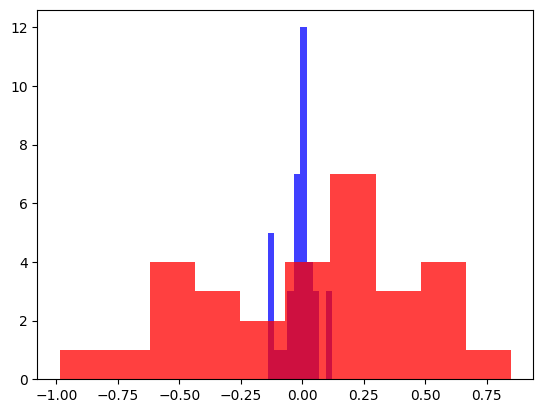

In [238]:
plt.hist(C['IATDisgust(pos=Wclean)'], alpha=0.75, color= 'b')
plt.hist(W['IATDisgust(pos=Wclean)'], alpha=0.75, color= 'r')
plt.show()

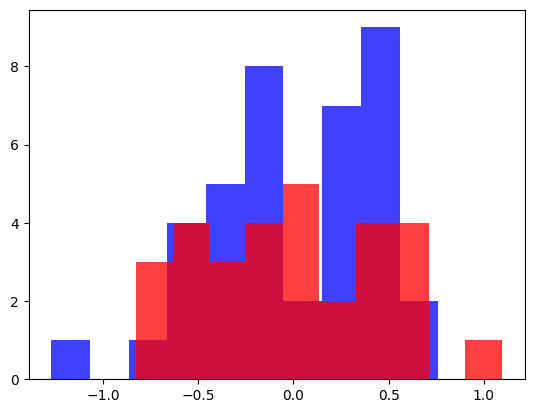

In [240]:
plt.hist(C['IATInt(pos=Wint)'], alpha=0.75, color= 'b')
plt.hist(W['IATInt(pos=Wint)'], alpha=0.75, color= 'r')
plt.show()

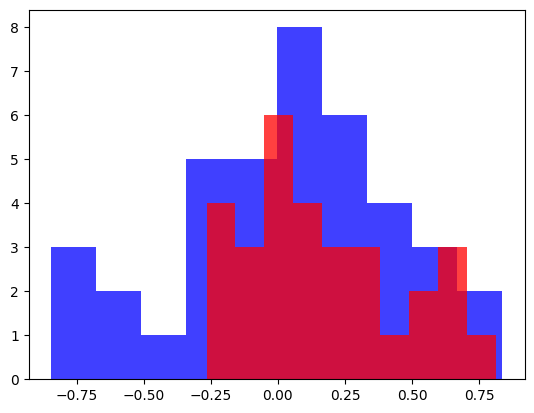

In [241]:
plt.hist(C['IATStr(pos=Wweak)'], alpha=0.75, color= 'b')
plt.hist(W['IATStr(pos=Wweak)'], alpha=0.75, color= 'r')
plt.show()

In [242]:
C['IATStr(pos=Wweak)'].mean()

0.027996614630145713

In [243]:
C['IATStr(pos=Wweak)'].std()

0.42060078920668226

In [244]:
W['IATStr(pos=Wweak)'].mean()

0.16255170497001153

In [245]:
W['IATStr(pos=Wweak)'].std()

0.296882838026691

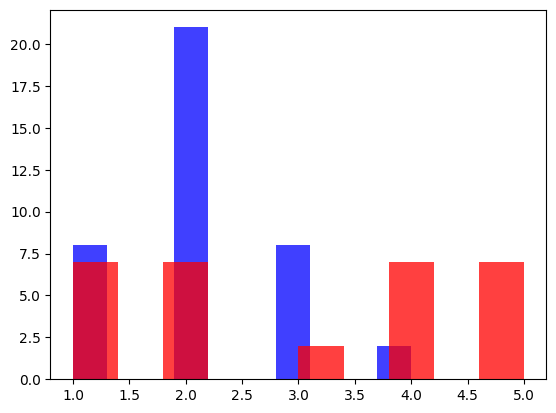

In [229]:
plt.hist(C['PolAff(1=Left)'], alpha=0.75, color= 'b')
plt.hist(W['PolAff(1=Left)'], alpha=0.75, color= 'r')
plt.show()

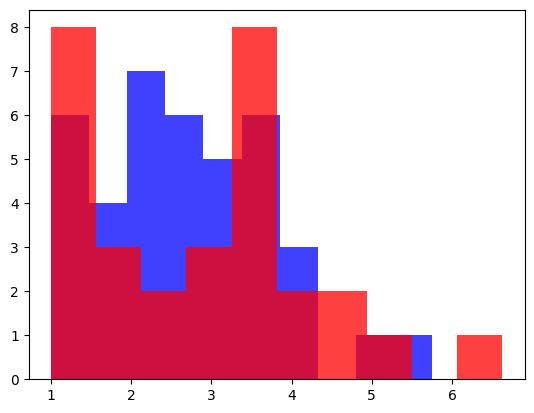

In [246]:
plt.hist(C['SDO'], alpha=0.75, color= 'b')
plt.hist(W['SDO'], alpha=0.75, color= 'r')
plt.show()

In [227]:
#@title Vizualization: Create a cross correlation

#Create a weighted heatmap of the cross correlations between the task and the questionnaires